# Bitcoin price stats

### To find
### 1.What was the change in price of the stock overtime?
### 2. Analysing open, high, low, close value of bitcoin with candle sticks
### 3. Analysing closing price
### 4. Perform analisis on closing price on yearly, quaterly and monthly basis

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data extraction

In [4]:
####replace with your path
df = pd.read_csv(r'C:\Users\lucas\general\cursos\09-python\01_data_analyst_python\02-project_bitcoin_stats/bitcoin_price.csv')

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [7]:
df.shape #rows x columns

(1556, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [11]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

# Data Transformation

In [12]:
df['Date'].astype('datetime64[ns]')
###pd.to_datetime() 

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [13]:
df['Date'].min() #min date

'Apr 01, 2014'

In [14]:
df['Date'].max() #max date

'Sep 30, 2016'

### check mising values

In [15]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

### check duplicated values

In [16]:
df.duplicated().sum()

0

In [17]:
df.head(3) ###first 3 values

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [18]:
df.tail(3) ###last 3 values

,Date,Open,High,Low,Close,Volume,Market Cap
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
1555,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"


### sort data ascending

In [37]:
data = df.sort_index(ascending=False).reset_index() ###the table not show te index necesary for graphics

In [38]:
data.drop('index', axis=1, inplace=True)

In [39]:
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
1551,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [30]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

# Data Visualization

# 1.What was the change in price of the stock overtime?

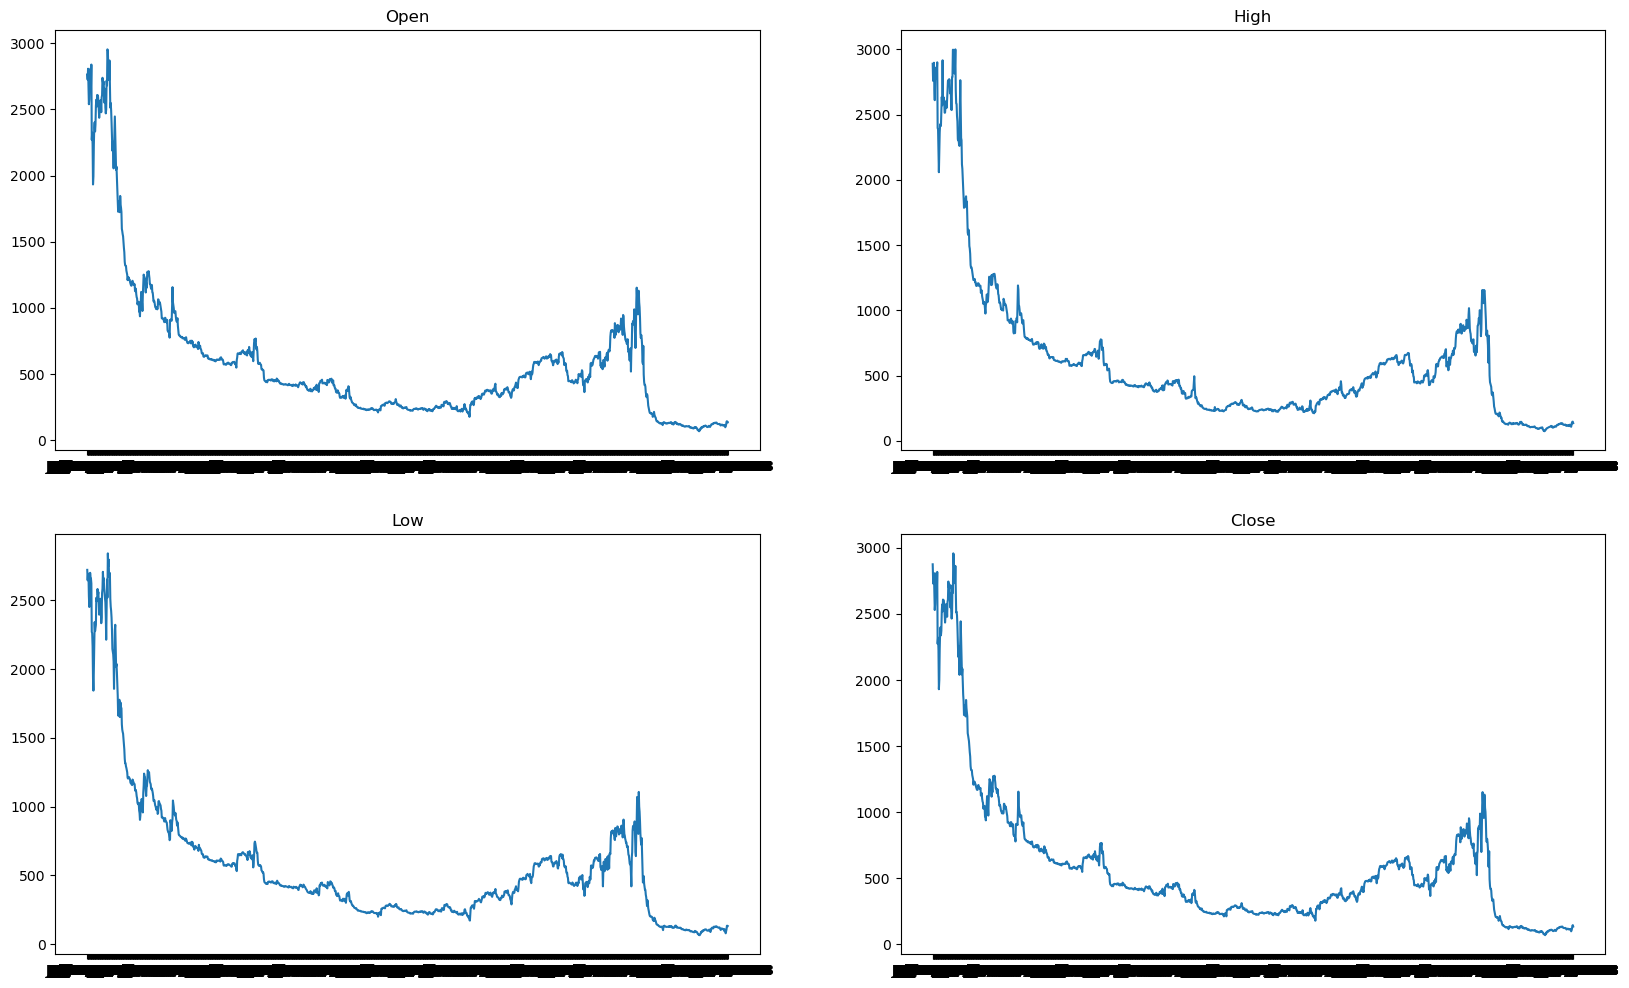

In [35]:
plt.figure(figsize=(20,12))
for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2, 2, index)
    plt.plot(df['Date'], df[col])
    plt.title(col)

# 2.Analysing open, high, low, close value of bitcoin with candle sticks

In [40]:
data.shape

(1556, 7)

In [45]:
bitcoin_sample = data[0:50]

In [41]:
!pip install chart_studio

In [42]:
!pip install plotly

In [43]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [44]:
init_notebook_mode(connected=True)

In [49]:
trace = go.Candlestick(x=bitcoin_sample['Date'], high=bitcoin_sample['High'], low=bitcoin_sample['Low'], open=bitcoin_sample['Open'], close=bitcoin_sample['Close'])

In [54]:
candle_data = [trace]
layout = {
    'title': 'Bitcoin historical price',
    'xaxis': {'title': 'Date'}
}

In [55]:
fig = go.Figure(data=candle_data, layout=layout)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

# 3. Analysing closing price

In [56]:
data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

<Axes: >

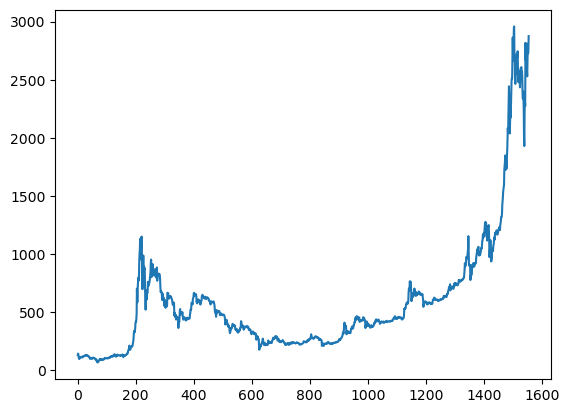

In [57]:
data['Close'].plot()

In [58]:
data.set_index('Date', inplace=True)

In [59]:
data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
"Apr 28, 2013",135.30,135.98,132.10,134.21,-,"1,500,520,000"
"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"
"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

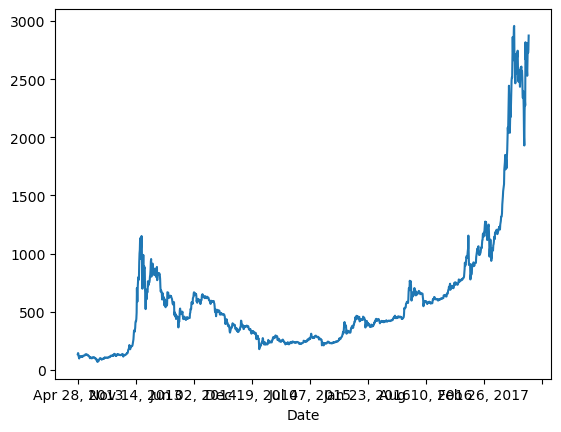

In [60]:
data['Close'].plot()

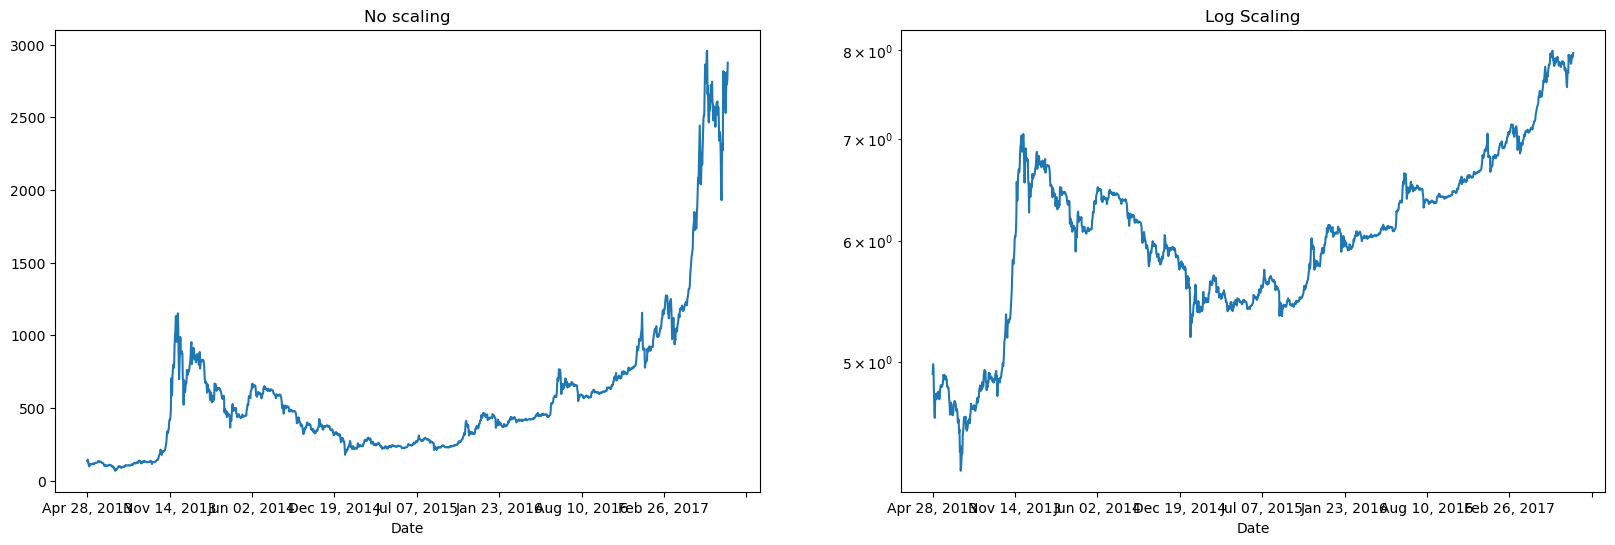

In [62]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title('No scaling')
plt.subplot(1,2,2)
np.log1p(data['Close']).plot() #logaritmic scale
plt.title('Log Scaling')
plt.yscale('log')